Jakub Dworzański

Korzystając z: https://youtu.be/Xxx0b7djCrs

Zostawiłem całkiem sporo komentarzy, mogą okazać się zbędne

In [1]:
# Rekurencyjnie, prościej, bardziej intuicyjnie
def levenstein(str1, str2):
    assert isinstance(str1, str) and isinstance(str2, str), "Wrong type of arguments. Use strings"
    checked = {}    # Słownik zawierający sprawdzone dotychczas pary słów
    def distance(a, b):
        if (a, b) in checked:    # Sprawdzenie, czy już sprawdzano daną parę wyrazów
            return checked[(a, b)]    # Jeżeli sprawdzono, oszczędzamy czas
        if not a:    # Odległością dowolnego wyrazu do wyrazu pustego jest jego długość
            return len(b)
        if not b:
            return len(a)
        delete_cost = distance(a[:-1], b) + 1    # Można utożsamić z "wypełnianiem" 
        insert_cost = distance(a, b[:-1]) + 1    # Tabelki z filmu prezentującego algorytm
        swap_cost = distance(a[:-1], b[:-1])
        if a[-1] != b[-1]:    # Zamiana "kosztuje" 2, jeżeli poprzednie litery są różne
            swap_cost += 2
        cost = min(delete_cost,
                   insert_cost,
                   swap_cost)    # Odległością jest minimalna z tych możliwości
        checked[(a, b)] = cost    # Zapamiętanie pośrednich wyników
        return cost
    return distance(str1, str2)

In [2]:
# Podana w treści zadania funkcja do szukania słów podobnych
def znajdź(słowo, słownik):
    n = len(słowo)
    słowo = słowo.lower()
    wyniki = [(levenstein(słowo, s.lower())/max(n, len(s)), s) for s in słownik]
    wyniki = [(d, s) for d, s in wyniki if d<=0.5]
    wyniki.sort()
    wyniki = [s for d, s in wyniki]
    return wyniki

In [3]:
znajdź("kotek", ["koteł", "pieseł", "Franek", "Zenek", "Kot"]) == ['koteł', 'Kot']
# Wynik to False, bo lista po prawej nie jest posortowana

False

In [4]:
# Iteracyjnie, może mniej przejrzyście, ale prawdopodobnie szybciej
def levenstein2(str1, str2):
    assert isinstance(str1, str) and isinstance(str2, str), "Wrong type of arguments. Use strings"
    a, b = len(str1), len(str2)     # Wysokość i szerokość tabeli potrzebnej do obliczenia odległości
    table = [[i for i in range(a+1)]]    # Przygotowanie pierwszego wiersza tabeli
    for i in range(1, b+1):    # Przygotowanie pierwszej kolumny tabeli
        table.append([i])
    for i in range(1, b+1):    # W każdej kolumnie
        for j in range(1, a+1):    # Dla każdej kolejnej komórki
            if str1[j-1] == str2[i-1]:    # "Cząstkową" odległość obliczamy na podstawie trzech sąsiednich
                table[i].append(min(table[i-1][j-1],
                                    table[i-1][j]+1,
                                    table[i][j-1]+1))
            else:
                table[i].append(min(table[i-1][j-1]+2,
                                    table[i-1][j]+1,
                                    table[i][j-1]+1))
    return table[-1][-1]    # Wynikiem jest skrajny element tablicy

In [5]:
def znajdź2(słowo, słownik):
    n = len(słowo)
    słowo = słowo.lower()
    wyniki = [(levenstein2(słowo, s.lower())/max(n, len(s)), s) for s in słownik]
    wyniki = [(d, s) for d, s in wyniki if d<=0.5]
    wyniki.sort()
    wyniki = [s for d, s in wyniki]
    return wyniki

In [6]:
# Wyniki szukania słów podobnych dla funkcji znajdź i znajdź2
print(znajdź("kotek", ["koteł", "pieseł", "Franek", "Zenek", "Kot"]))
print(znajdź2("kotek", ["koteł", "pieseł", "Franek", "Zenek", "Kot"]))
print(znajdź("królowa", ["król", "królewna", "księżniczka", "pałac", "królewskie", "Wawel"]))
print(znajdź2("królowa", ["król", "królewna", "księżniczka", "pałac", "królewskie", "Wawel"]))
print(znajdź("Polak", ["Polska", "polski", "pole", "folklor", "polk", "cebula"]))
print(znajdź2("Polak", ["Polska", "polski", "pole", "folklor", "polk", "cebula"]))
print(znajdź("Windows", ["window", 'okno', 'okna', 'winda', 'Gates', 'widow']))
print(znajdź2("Windows", ["window", 'okno', 'okna', 'winda', 'Gates', 'widow']))
print(znajdź("sprawozdanie", ["sprawa", "sprawozdania", "sprowazdanie", "raport", "druk"]))
print(znajdź2("sprawozdanie", ["sprawa", "sprawozdania", "sprowazdanie", "raport", "druk"]))
print(znajdź("Python", ["typhon", "wąż", "pyton", "monty python", "pole", "rabarbar"]))
print(znajdź2("Python", ["typhon", "wąż", "pyton", "monty python", "pole", "rabarbar"]))


['Kot', 'koteł']
['Kot', 'koteł']
['królewna', 'król']
['królewna', 'król']
['polk', 'Polska', 'polski']
['polk', 'Polska', 'polski']
['window', 'widow']
['window', 'widow']
['sprawozdania', 'sprowazdanie', 'sprawa']
['sprawozdania', 'sprowazdanie', 'sprawa']
['pyton', 'monty python']
['pyton', 'monty python']


Rzut okiem na pozostałe odległości

In [7]:
from pprint import pprint as pp

In [8]:
def odległość(słowo, słownik):
    n = len(słowo)
    słowo = słowo.lower()
    wyniki = [(levenstein2(słowo, s.lower())/max(n, len(s)), s) for s in słownik]
    return sorted(wyniki)

In [9]:
pp(odległość("kotek", ["koteł", "pieseł", "Franek", "Zenek", "Kot"]))
pp(odległość("królowa", ["król", "królewna", "księżniczka", "pałac", "królewskie", "Wawel"]))
pp(odległość("Polak", ["Polska", "polski", "pole", "folklor", "polk", "cebula"]))
pp(odległość("Windows", ["window", 'okno', 'okna', 'winda', 'Gates', 'widow']))
pp(odległość("sprawozdanie", ["sprawa", "sprawozdania", "sprowazdanie", "raport", "druk"]))
pp(odległość("Python", ["typhon", "wąż", "pyton", "monty python", "pole", "rabarbar"]))

[(0.4, 'Kot'),
 (0.4, 'koteł'),
 (1.1666666666666667, 'Franek'),
 (1.2, 'Zenek'),
 (1.5, 'pieseł')]
[(0.375, 'królewna'),
 (0.42857142857142855, 'król'),
 (0.7, 'królewskie'),
 (1.1428571428571428, 'Wawel'),
 (1.2727272727272727, 'księżniczka'),
 (1.4285714285714286, 'pałac')]
[(0.2, 'polk'),
 (0.5, 'Polska'),
 (0.5, 'polski'),
 (0.6, 'pole'),
 (0.8571428571428571, 'folklor'),
 (1.1666666666666667, 'cebula')]
[(0.14285714285714285, 'window'),
 (0.2857142857142857, 'widow'),
 (0.5714285714285714, 'winda'),
 (1.0, 'okno'),
 (1.2857142857142858, 'okna'),
 (1.4285714285714286, 'Gates')]
[(0.16666666666666666, 'sprawozdania'),
 (0.3333333333333333, 'sprowazdanie'),
 (0.5, 'sprawa'),
 (1.0, 'raport'),
 (1.1666666666666667, 'druk')]
[(0.16666666666666666, 'pyton'),
 (0.5, 'monty python'),
 (0.6666666666666666, 'typhon'),
 (1.0, 'pole'),
 (1.5, 'wąż'),
 (1.75, 'rabarbar')]


Szybkie porównanie czasów działania w kilku szczególnych przypadkach

In [10]:
import time

In [11]:
napis1 = "asdufigbqownicszpohdfqiwuencsoidghfbqnolodimvpsaodihgqwoeiuihfnsidulghqniwidhfnsiougheoruiwnfoisduhgnieoudnfsvosiuasmhgoewricmhgismdfjcosimghfcweoirgmcsoifcgmjscifm,kwcoigjm,smiod;gim,vcewr;ojgcmwerogmc,sjdg9328gm,ucjew8rjgm,sldjgm,2983 \4gmhcx24m ,worgmsjc;ojerug,3209jgshfdlgj29304,gm easdufigbqownicszpohdfqiwuencsoidghfbqnolodimvpsaodihgqwoeiuihfnsidulghqniwidhfnsiougheoruiwnfoisduhgnieoudnfsvosiuasmhgoewricmhgismdfjcosimghfcweoirgmcsoifcgmjscifm,kwcoigjm,smiod;gim,vcewr;ojgcmwerogmc,sjdg9328gm,ucjew8rjgm,sldjgm,2983 \4gmhcx24m ,worgmsjc;ojerug,3209jgshfdlgj29304,gm easdufigbqownicszpohdfqiwuencsoidghfbqnolodimvpsaodihgqwoeiuihfnsidulghqniwidhfnsiougheoruiwnfoisduhgnieoudnfsvosiuasmhgoewricmhgismdfjcosimghfcweoirgmcsoifcgmjscifm,kwcoigjm,smiod;gim,vcewr;ojgcmwerogmc,sjdg9328gm,ucjew8rjgm,sldjgm,2983 \4gmhcx24m ,worgmsjc;ojerug,3209jgshfdlgj29304,gm easdufigbqownicszpohdfqiwuencsoidghfbqnolodimvpsaodihgqwoeiuihfnsidulghqniwidhfnsiougheoruiwnfoisduhgnieoudnfsvosiuasmhgoewricmhgismdfjcosimghfcweoirgmcsoifcgmjscifm,kwcoigjm,smiod;gim,vcewr;ojgcmwerogmc,sjdg9328gm,ucjew8rjgm,sldjgm,2983 \4gmhcx24m ,worgmsjc;ojerug,3209jgshfdlgj29304,gm e"
napis2 = "bvdasofnqpodnksvoiusadjfncosiflvdmuonchskdghfmnalwedjfmowqifdjcmsigfkqw9xixdjfigaikvhscinmfjwxiecmawexfhmasiewlfhmrewg ijmogumsegu9m32jsfmgp324fmas;ag'mgjagmbdfv ergmfur;gmhfqwurgfwelhr g;we ugmwregshfsrgwe'g wergmegrjewjgmewg;hwegewrguwe'rgmwhegrweg ewrguewrgewhgweermgwergwergwmsvsgr9wmgrwebvdasofnqpodnksvoiusadjfncosiflvdmuonchskdghfmnalwedjfmowqifdjcmsigfkqw9xixdjfigaikvhscinmfjwxiecmawexfhmasiewlfhmrewg ijmogumsegu9m32jsfmgp324fmas;ag'mgjagmbdfv ergmfur;gmhfqwurgfwelhr g;we ugmwregshfsrgwe'g wergmegrjewjgmewg;hwegewrguwe'rgmwhegrweg ewrguewrgewhgweermgwergwergwmsvsgr9wmgrwebvdasofnqpodnksvoiusadjfncosiflvdmuonchskdghfmnalwedjfmowqifdjcmsigfkqw9xixdjfigaikvhscinmfjwxiecmawexfhmasiewlfhmrewg ijmogumsegu9m32jsfmgp324fmas;ag'mgjagmbdfv ergmfur;gmhfqwurgfwelhr g;we ugmwregshfsrgwe'g wergmegrjewjgmewg;hwegewrguwe'rgmwhegrweg ewrguewrgewhgweermgwergwergwmsvsgr9wmgrwebvdasofnqpodnksvoiusadjfncosiflvdmuonchskdghfmnalwedjfmowqifdjcmsigfkqw9xixdjfigaikvhscinmfjwxiecmawexfhmasiewlfhmrewg ijmogumsegu9m32jsfmgp324fmas;ag'mgjagmbdfv ergmfur;gmhfqwurgfwelhr g;we ugmwregshfsrgwe'g wergmegrjewjgmewg;hwegewrguwe'rgmwhegrweg ewrguewrgewhgweermgwergwergwmsvsgr9wmgrwe"
start = time.perf_counter()
print(levenstein(napis1, napis2))
print("Czas działania rekurencyjnie:", time.perf_counter() - start)
start = time.perf_counter()
print(levenstein2(napis1, napis2))
print("Czas działania iteracyjnie:", time.perf_counter() - start)

1452
Czas działania rekurencyjnie: 8.37054089999998
1452
Czas działania iteracyjnie: 1.4416410999999698


In [12]:
# Czasy nie powinny znacznie różnić się przy tej samej długości słów, ponieważ i tak trzeba "wypełnić całą tabelkę"
# Dlatego testowym przypadkiem będą dwa "słowa" o równej długości
def mierz_czas(alg, n, M=100):
    napis1 = n * 'a'
    napis2 = n * 'b'
    def pomiar():
        start = time.perf_counter()
        alg(napis1, napis2)
        return time.perf_counter() - start
    return [pomiar() for m in range(M)]

In [13]:
M = 100
n = 100

In [14]:
rek = mierz_czas(levenstein, n, M)

In [15]:
ite = mierz_czas(levenstein2, n, M)

In [16]:
import matplotlib.pyplot as plt

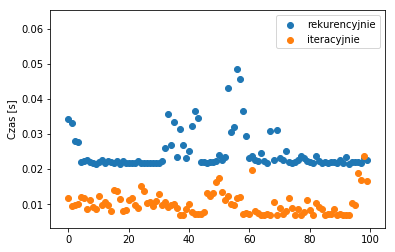

In [17]:
plt.scatter(range(M), rek, label='rekurencyjnie')
plt.scatter(range(M), ite, label='iteracyjnie')
plt.legend()
plt.ylabel("Czas [s]")
plt.show()

In [18]:
import pandas as pd
import numpy as np

In [19]:
def df_from_lists(tab_rek, tab_ite):
    dane = {}
    dane['czas'] = np.array(tab_rek + tab_ite)
    dane['label'] = np.array(len(tab_rek)*['rekurencyjnie'] + len(tab_ite)*['iteracyjnie'])
    return pd.DataFrame(dane)

In [20]:
dane = df_from_lists(rek, ite)

In [21]:
import seaborn as sns

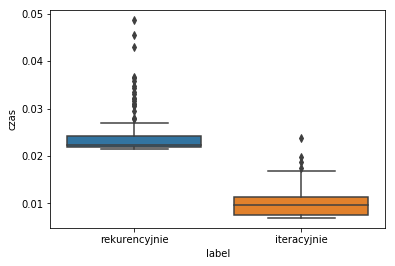

In [22]:
sns.boxplot(x='label', y='czas', data=dane)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


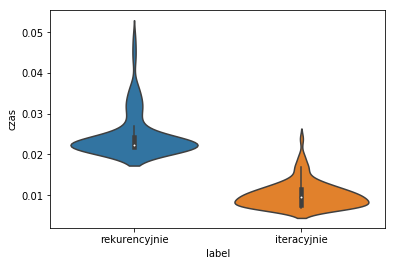

In [23]:
sns.violinplot(x='label', y='czas', data=dane)

Ja jako implementację algorytmu wybrałbym iteracyjną:

In [54]:
def levenstein(str1, str2):
    a, b = len(str1), len(str2)
    table = [list(range(a+1))]
    table.extend([[i] for i in range(1, b+1)])
    for i in range(1, b+1):
        for j in range(1, a+1):
            if str1[j-1] == str2[i-1]:
                table[i].append(min(table[i-1][j-1],
                                    table[i-1][j]+1,
                                    table[i][j-1]+1))
            else:
                table[i].append(min(table[i-1][j-1]+2,
                                    table[i-1][j]+1,
                                    table[i][j-1]+1))
    return table[-1][-1] 